<a href="https://colab.research.google.com/github/karans17s/Practical_Implementation_Of_Deep_learning/blob/main/PHASE_1_EDA_WITH_TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step : 1 == import req. lib

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mode, norm, skew, kurtosis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
sns.set(style='white', context='notebook', palette='deep')

# Step : 2 == Load data csv file

In [ ]:
data_frame_train = pd.read_csv('/content/train.csv')
data_frame_test = pd.read_csv('/content/test (1).csv')

In [ ]:
data_frame_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_frame_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Now , show the null places in train set...

# Step : 3 == find the null spaces

In [ ]:
null_place = data_frame_train.isnull().sum()
null_place

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Percentage...

In [ ]:
null_place = (data_frame_train.isnull().sum() / len(data_frame_train)) * 100
null_place

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
null_place = data_frame_test.isnull().sum()
null_place

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
null_place = (data_frame_train.isnull().sum() / len(data_frame_train)) * 100
null_place

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


# Step : 4 == show survived info of male and female

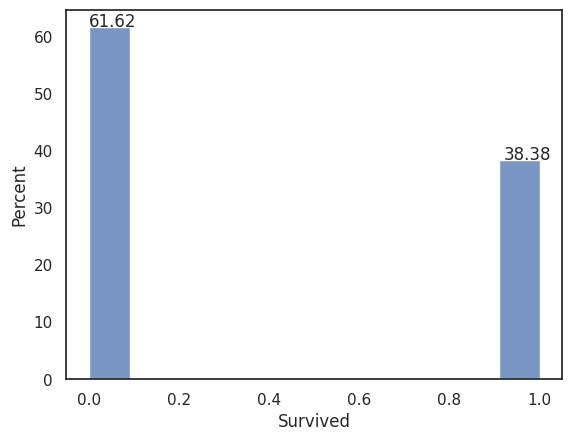

In [ ]:
sns.histplot(x="Survived", stat="percent", data= data_frame_train) #This works

per_class_0=round(((data_frame_train.loc[:,"Survived"]==0).sum()/len(data_frame_train))*100,2)
per_class_1=round(((data_frame_train.loc[:,"Survived"]==1).sum()/len(data_frame_train))*100,2)

for i, fr in [(0,per_class_0), (0.92,per_class_1)]:
    plt.text(i, fr+0.1, str(fr))

In [ ]:
male = (( data_frame_train.loc[ : , 'Sex' ] == 'male') & ( data_frame_train.loc[ : , 'Survived' ] == 1)).sum() / ( data_frame_train.loc[ : , 'Sex' ] == 'male').sum()
female = (( data_frame_train.loc[ : , 'Sex' ] == 'female') & ( data_frame_train.loc[ : , 'Survived' ] == 1)).sum() / ( data_frame_train.loc[ : , 'Sex' ] == 'female').sum()

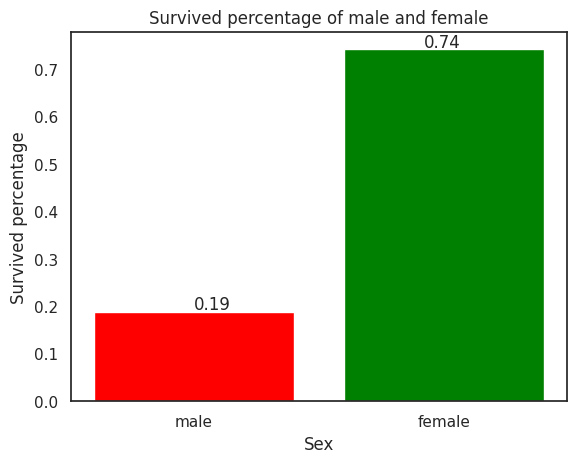

In [ ]:
plt.bar ( x = ['male' , 'female'] , height = [ male , female] , color = ['red' , 'green'] )
plt.xlabel('Sex')
plt.ylabel('Survived percentage')
plt.title('Survived percentage of male and female')

for x,per in [( 0 , male ), (0.92 , female )]:
    plt.text(x,per+0.005, str(round(per,2)))


# In This Movie , also show priority of class (  like first class , second class , third class ) so , compute pclass among the female who did not survive.

<Figure size 640x480 with 0 Axes>

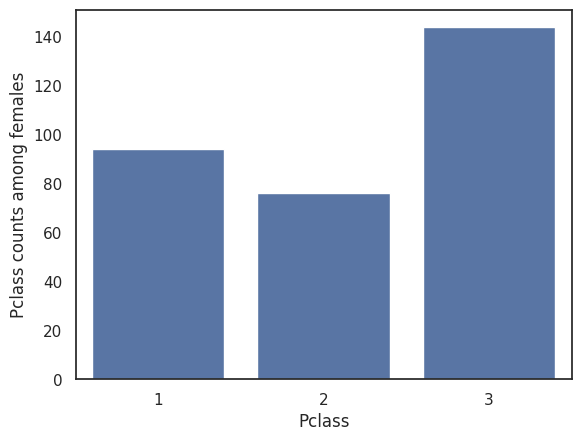

<Figure size 640x480 with 0 Axes>

In [ ]:
ax=sns.countplot(x="Pclass", data = data_frame_train.loc[ ( data_frame_train.loc[:,"Sex"]=='female'), :])
ax.set_ylabel('Pclass counts among females')

#Now Pclass among females who died
plt.figure()

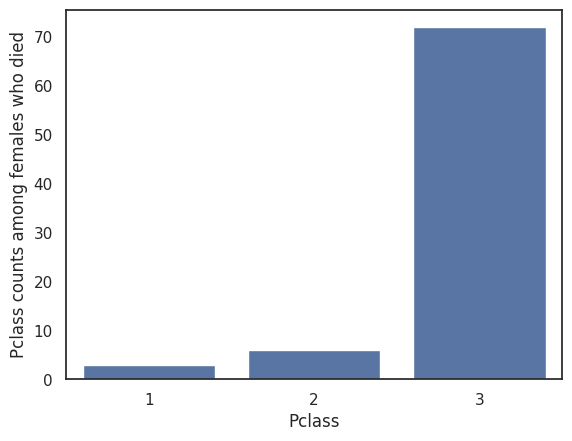

In [ ]:
ax = sns.countplot(x="Pclass", data = data_frame_train.loc[ ( data_frame_train.loc[:,"Sex"]=='female') & ( data_frame_train.loc[:,"Survived"]==0), :])
ax.set_ylabel('Pclass counts among females who died')

counts = data_frame_train.loc[ data_frame_train.loc[:,"Sex"]=='female' ,["Sex", "Pclass"]].groupby("Pclass").count()
counts = data_frame_train.loc[ data_frame_train.loc[:,"Sex"]=='female' ,["Sex", "Pclass"]].groupby("Pclass")["Sex"].count()
total_n_females_Pclasswise=counts.tolist()

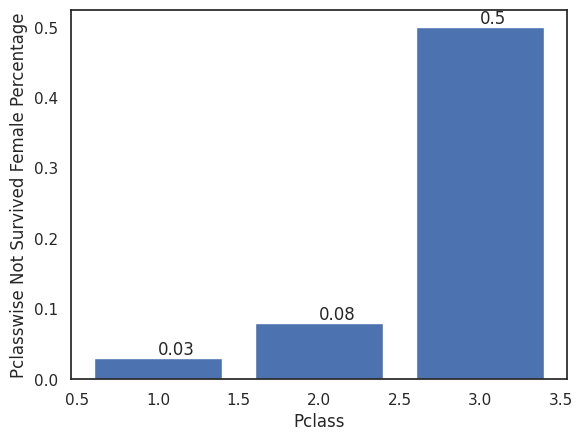

In [ ]:
not_survived_n_females_Pclasswise = data_frame_train.loc[ ( data_frame_train.loc[:,"Sex"]=='female') & ( data_frame_train.loc[:, "Survived"]==0) ,["Sex", "Pclass"]].groupby("Pclass")["Sex"].count().tolist()

plt.figure()
height1=[round(i/j,2) for i, j in zip(not_survived_n_females_Pclasswise, total_n_females_Pclasswise)]

plt.bar(x=[1,2,3], height=height1)
plt.xlabel("Pclass")
plt.ylabel("Pclasswise Not Survived Female Percentage")
for i, h in zip([1,2,3],height1):
    plt.text(i,h+0.005,str(h))

# Now , count plots for the pclasswise and genderwise survival....

Text(0, 0.5, 'Survival Count')

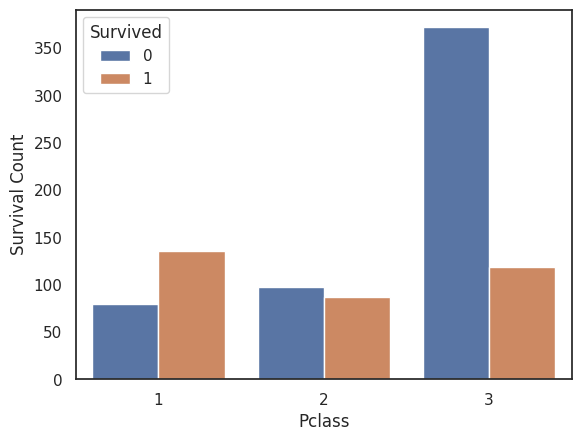

In [ ]:
ax=sns.countplot(x="Pclass", hue="Survived", data = data_frame_train)
ax.set_ylabel("Survival Count")

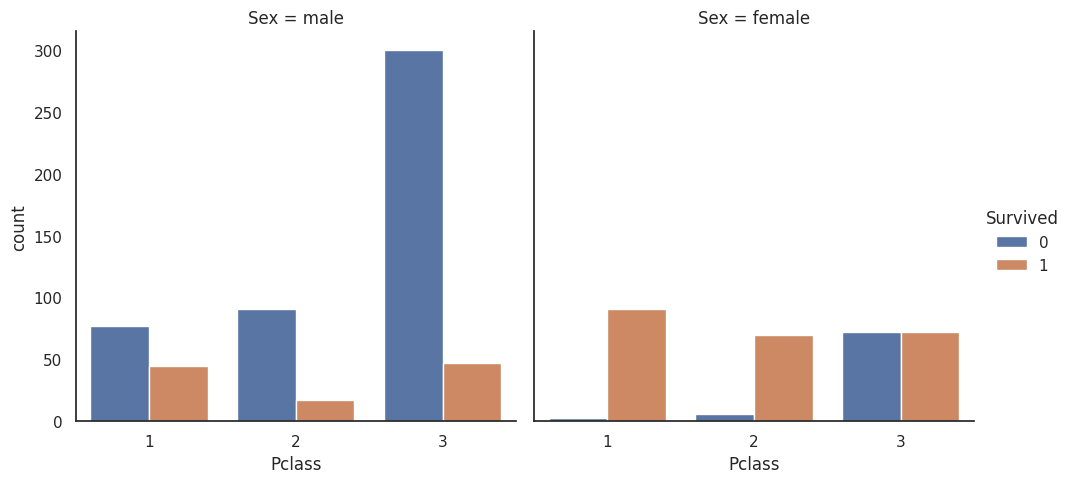

In [ ]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", data = data_frame_train , kind="count")

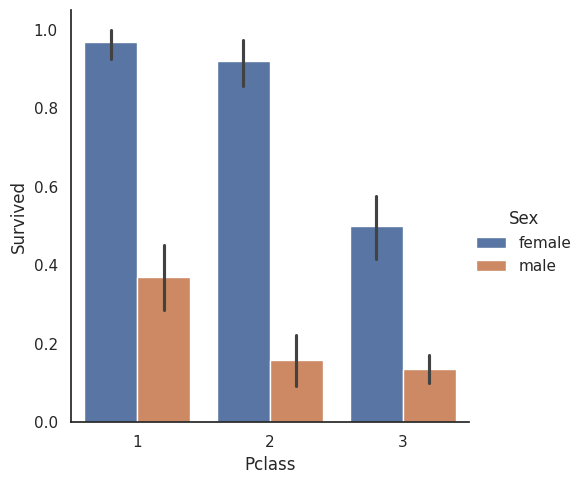

In [ ]:
sns.catplot(x="Pclass", y="Survived", hue="Sex", data = data_frame_train , kind="bar")

<Axes: xlabel='Pclass', ylabel='Survived'>

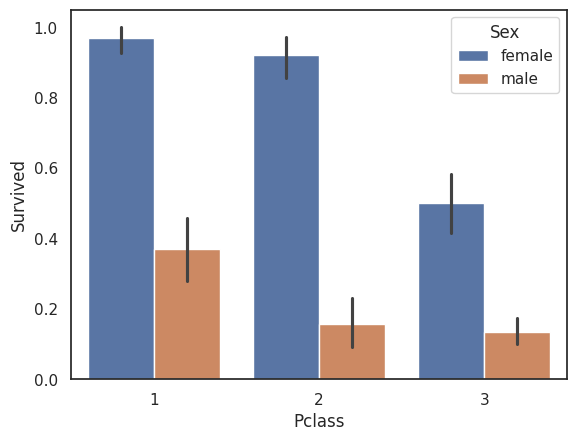

In [ ]:
sns.barplot ( x = 'Pclass' , y = 'Survived' , hue = 'Sex' , data = data_frame_train)

<Axes: xlabel='Age', ylabel='Survived'>

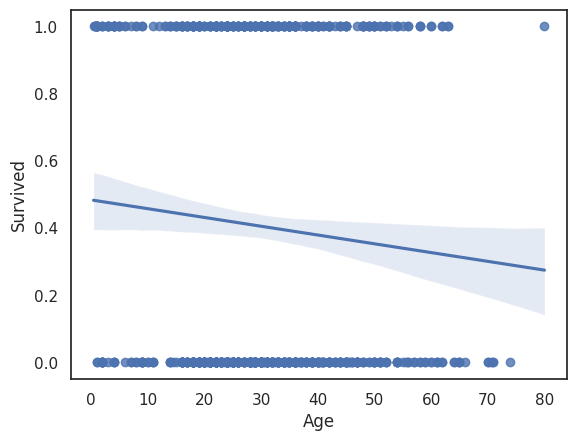

In [ ]:
sns.regplot ( x = 'Age' , y = 'Survived' , data = data_frame_train )

# Now , compute the salutation ( name of prefix....)

In [ ]:
data_frame_train['Salutation'] = data_frame_train['Name'].str.extract(pat=' ([A-Za-z]+)\.', expand=False)
data_frame_test['Salutation'] = data_frame_test['Name'].str.extract(pat=' ([A-Za-z]+)\.', expand=False)

In [ ]:
data_frame_train['Salutation'].value_counts()

,count
Salutation,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
data_frame_test['Salutation'].value_counts()

,count
Salutation,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [ ]:
mapping={'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [ ]:
data_frame_train.replace({"Salutation":mapping}, inplace=True)
data_frame_test.replace({"Salutation":mapping}, inplace=True)

In [ ]:
data_frame_train["Salutation"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

# get the median age salutationwise

In [ ]:
temp = data_frame_train.loc[:,["Age", "Salutation"]].groupby("Salutation")["Age"].median()

In [ ]:
for i in range(len(temp.index)):
    data_frame_train.loc[ data_frame_train.loc[:,"Salutation"] == temp.index[i] , "Age"] = temp[i]
    data_frame_train.loc[ data_frame_train.loc[:,"Salutation"] == temp.index[i] , "Age"] = temp[i]

In [ ]:
#Construct a new attribute let us name 'GenderPlus' with possible values female, boy and male
#We suspect that boys will have better chance of survival than adult males
data_frame_train["GenderPlus"] = data_frame_train["Sex"]
data_frame_test["GenderPlus"] = data_frame_test["Sex"]

data_frame_train.loc[ data_frame_train.loc[:,"Salutation"]=="Master", "GenderPlus"]="boy"
data_frame_train.loc[ data_frame_train.loc[:,"Salutation"]=="Master", "GenderPlus"]="boy"

# Now visualize survival percentage of boys vs adult males

In [ ]:
n_males_survived = data_frame_train.loc[ ( data_frame_train.loc[:,"GenderPlus"]=='male') & ( data_frame_train.loc[:,"Survived"]==1) ,"GenderPlus"].count()
n_males = data_frame_train.loc[ data_frame_train.loc[:,"GenderPlus"]=='male' ,"GenderPlus"].count()
surv_perc_of_males= round(n_males_survived/n_males,2)
print(surv_perc_of_males)

0.16


In [ ]:
n_boys_survived = data_frame_train.loc[ (data_frame_train.loc[:,"GenderPlus"]=='boy') & (data_frame_train.loc[:,"Survived"]==1) ,"GenderPlus"].count()
n_boys= data_frame_train.loc[ data_frame_train.loc[:,"GenderPlus"]=='boy' ,"GenderPlus"].count()
surv_perc_of_boys= round(n_boys_survived/n_boys,2)
print(surv_perc_of_boys)

0.57


# **STEP : I == Import lib**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# **STEP :II == Load dataset**

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test (1).csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **STEP : III == Datapreprocessing**

In [ ]:
def preprocess_data(df):
    df = df.copy()

    # Fill missing values.................
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convert categorical columns to numeric....................
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Select relevant features.......................
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    return df[features]

# **STEP : IV == Plotting**

In [ ]:
def plot_data(train_data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Survived', data=train_data, palette='viridis')
    plt.title('Survival Count')
    plt.show()

    plt.figure(figsize=(10, 6))

    # Select only numeric features for correlation
    numeric_features = train_data.select_dtypes(include=['number'])
    sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

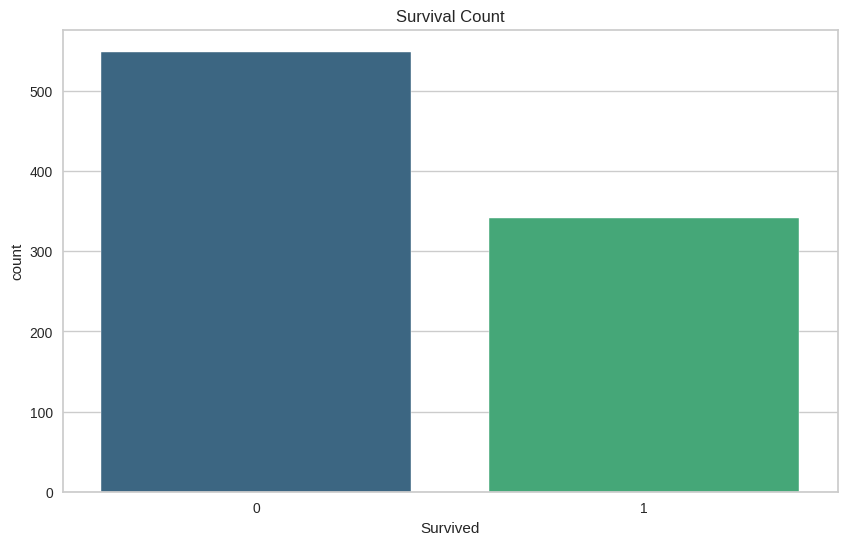

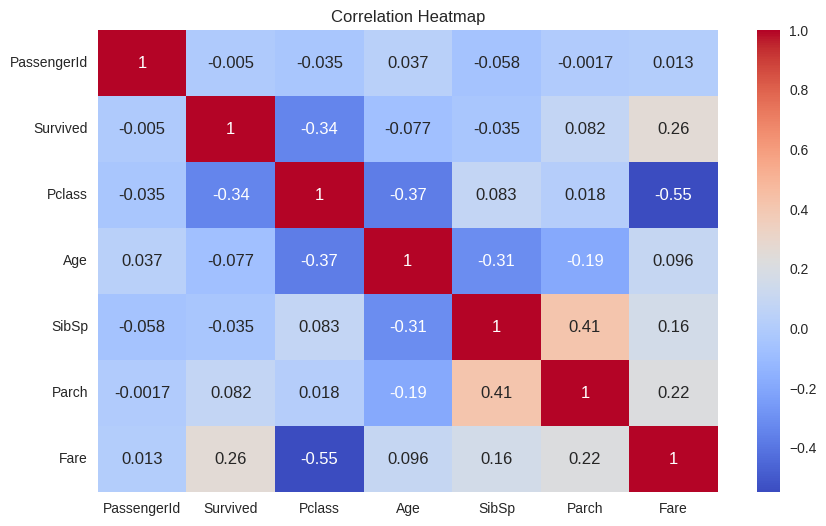

In [ ]:
plot_data(train_data)

correlation heatmap means....correlation numerical features in datasets.... here , 7 features , which consider a numercial values...

1 == perfect positive correlation  ( dark red )

-1 == perfect negative correlation  ( dark blue )

0 == No correlation  ( light color )

Some explanation :

survived <-> pclass ( -0.34 ) means negative correlation passengers in lower classes were less likely to survive.


survived <-> fare ( 0.26 ) means positive correlation passengers who paid higher fares were more likely to survive.

like show , pclass <-> fare...


benefits...

exploratory data analysis ( EDA )

In [ ]:
x = preprocess_data(train_data)
y = train_data['Survived']
x_test = preprocess_data(test_data)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

# **STEP : V == use random forest for classification**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(X_val)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))

Random Forest Classifier Results:
Accuracy: 0.5195530726256983
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       119
           1       0.32      0.40      0.36        60

    accuracy                           0.52       179
   macro avg       0.49      0.49      0.49       179
weighted avg       0.55      0.52      0.53       179



In [ ]:
from sklearn.metrics import confusion_matrix

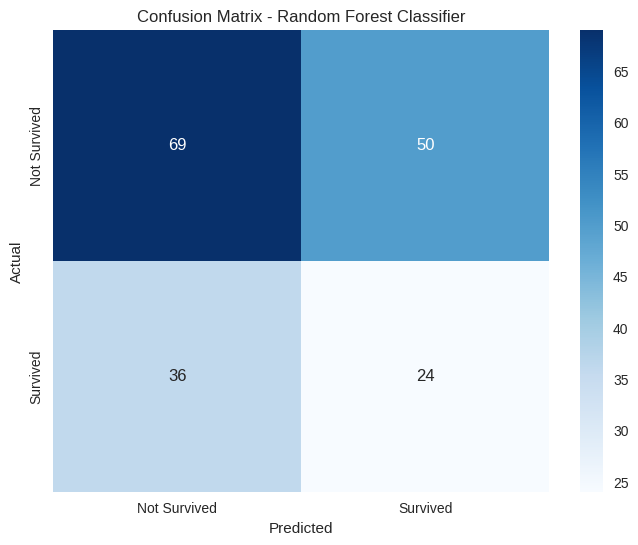

In [ ]:
rf_cm = confusion_matrix(y_val, rf_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **STEP : VI == using SVC for classification**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_preds = svm_model.predict(x_val_scaled)
print("\nSupport Vector Machine Classifier Results:")
print("Accuracy:", accuracy_score(y_val, svm_preds))
print(classification_report(y_val, svm_preds))


Support Vector Machine Classifier Results:
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       119
           1       0.79      0.70      0.74        60

    accuracy                           0.84       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179



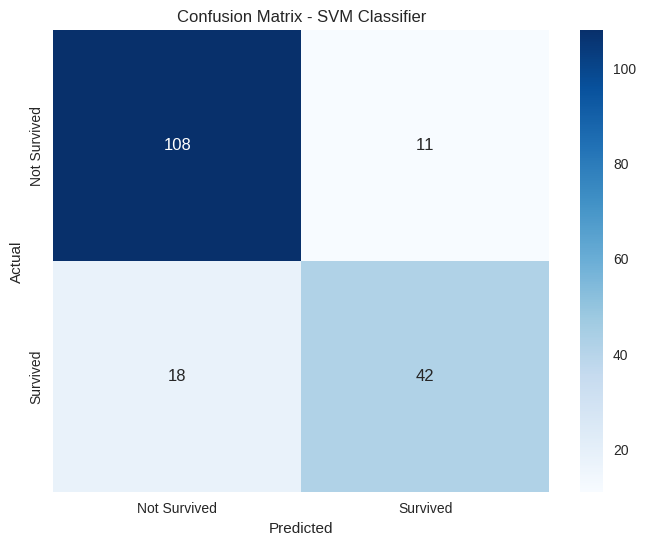

In [ ]:
svm_cm = confusion_matrix(y_val, svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **STEP : VII == save the model**

In [ ]:
test_preds_rf = rf_model.predict(x_test)
test_preds_svm = svm_model.predict(x_test_scaled)

In [ ]:
submission_rf = pd.DataFrame({"PassengerId": test_data['PassengerId'], "Survived": test_preds_rf})
submission_svm = pd.DataFrame({"PassengerId": test_data['PassengerId'], "Survived": test_preds_svm})
submission_rf.to_csv("submission_rf.csv", index=False)
submission_svm.to_csv("submission_svm.csv", index=False)

In [ ]:
data_frame_rf = pd.read_csv('/content/submission_rf.csv')
data_frame_svm = pd.read_csv('/content/submission_svm.csv')

In [ ]:
data_frame_rf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
data_frame_svm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
